In [42]:
#libraries needed
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
### ETAPE 1:  Compréhension de l'Ensemble de Données ###
file_path = "C:\\Users\\DrdrA\\OneDrive\\Desktop\\UNI\\M2\\Ca\\projet\\train_ML_IOT.csv"
df = pd.read_csv(file_path)
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [44]:
### ETAPE 2: Prétraitement des Données ###

#Les schémas de circulation pendant les jours fériés, ainsi qu'à 
#diverses autres occasions au cours de l'année, diffèrent des jours de travail normaux.
# Convert 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])
# Extract time-related features
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['DayOfMonth'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year
# weekday or weekend
#Samedi + Dimanche : weekend , lundi+mardi+merc+jeudi+vendredi: weekdays. 
df['WeekdayOrWeekend'] = df['DateTime'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
print(df.columns) #added the new columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID', 'Hour', 'DayOfWeek',
       'DayOfMonth', 'Month', 'Year', 'WeekdayOrWeekend'],
      dtype='object')


In [45]:
#finding out missing values
missing_values = df.isnull().sum()
print(missing_values) #there are none

DateTime            0
Junction            0
Vehicles            0
ID                  0
Hour                0
DayOfWeek           0
DayOfMonth          0
Month               0
Year                0
WeekdayOrWeekend    0
dtype: int64


In [46]:
#normilizing Vehicles column
min_value = df['Vehicles'].min()
max_value = df['Vehicles'].max()

df['Normalized_Vehicles'] = (df['Vehicles'] - min_value) / (max_value - min_value)

print(df['Normalized_Vehicles'])

0        0.078212
1        0.067039
2        0.050279
3        0.033520
4        0.044693
           ...   
48115    0.055866
48116    0.162011
48117    0.083799
48118    0.117318
48119    0.061453
Name: Normalized_Vehicles, Length: 48120, dtype: float64


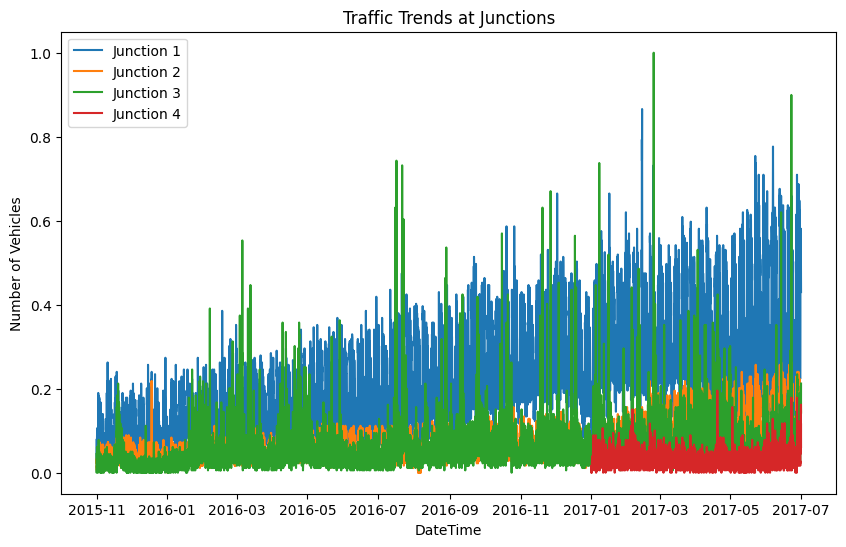

In [47]:
### ETAPE 3:  Analyse Exploratoire des Données ###
plt.figure(figsize=(10, 6))
for junction_id in df['Junction'].unique():
    junction_data = df[df['Junction'] == junction_id]
    plt.plot(junction_data['DateTime'], junction_data['Normalized_Vehicles'], label=f'Junction {junction_id}')

plt.title('Traffic Trends at Junctions')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()